# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


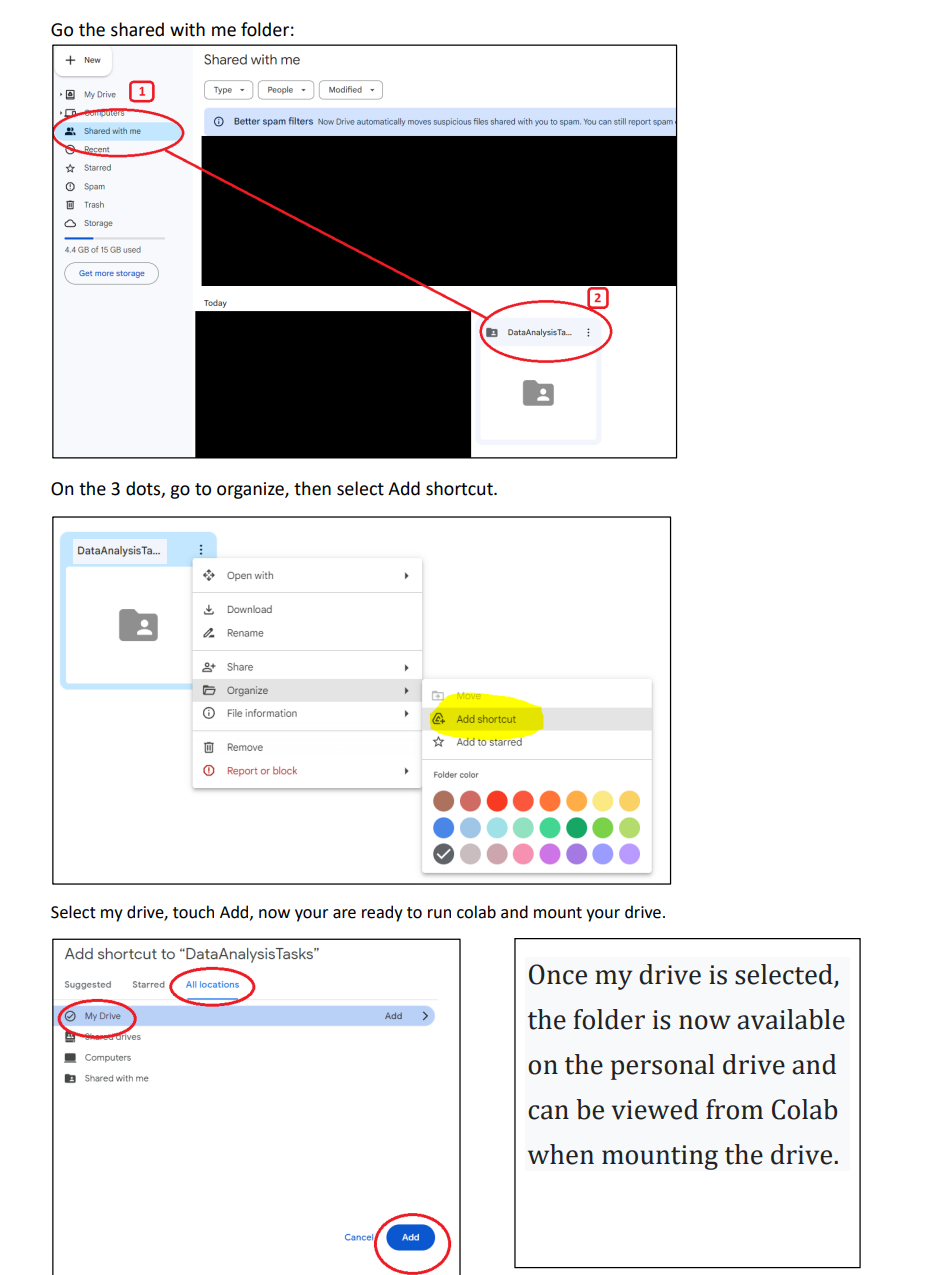

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from pyproj import Transformer
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Viridis10
from bokeh.plotting import figure
from bokeh.tile_providers import Vendors

output_notebook()

# Load the CSV file
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/ufo_sighting_data.csv")

# Select events only from New Mexico (US)
nm = df[(df["country"] == "us") & (df["state/province"] == "nm")]

# Transform the coordinates to X,Y
transformer = Transformer.from_crs(crs_from="EPSG:4326", crs_to="EPSG:3857", always_xy=True)
nm["x"], nm["y"] = transformer.transform(nm["longitude"].values, nm["latitude"].values)

# Create an object from the `ColumnDataSource` class
source = ColumnDataSource(nm)

# Define the information to be shown in the tooltip
tooltips = [("Date:", "@{Date_time}"),
            ("City:", "@{city}"),
            ("Shape:", "@{UFO_shape}"),
            ("Length of encounter:", "@{length_of_encounter_seconds} seconds")]

# Create a figure
map = figure(title='UFO Sightings in New Mexico (US)',
             width=800,
             height=600,
             x_axis_type='mercator',
             y_axis_type='mercator',
             tooltips=tooltips,)

# Define the Kernel Density Estimation function
def kde(x, y, N):
    """
    Calculate a 2D Kernel Density Estimation (KDE) and visualize it.

    This function computes the KDE for 2D data points (x, y) and generates a plot
    illustrating the estimated density distribution on a grid.

    Parameters
    ----------
    x : numpy.ndarray
        Input data for the x-coordinate.
    y : numpy.ndarray
        Input data for the y-coordinate.
    N : int
        Number of grid points for visualization.

    Returns
    -------
    X : numpy.ndarray
        Meshgrid of x-coordinates for the visualization grid.
    Y : numpy.ndarray
        Meshgrid of y-coordinates for the visualization grid.
    Z : numpy.ndarray
        Estimated density values on the visualization grid.
    """

    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    X, Y = np.mgrid[xmin:xmax:N*1j, ymin:ymax:N*1j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    return X, Y, Z

# Create a contour plot using the KDE function defined previously
x, y, z = kde(nm.x, nm.y, 300)
palette = Viridis10[::-1]
levels = np.linspace(np.min(z), np.max(z), 10)
map.contour(x, y, z, levels[1:], fill_color=palette, line_color=palette)

# Draw locations in the map
scatter = map.scatter(x="x", y="y", source=source, fill_alpha=0.2, line_color=None)

# Add the Positron map from Carto as tile
map.add_tile(Vendors.CARTODBPOSITRON)

# Display the map using show function
show(map)

<ipython-input-6-947f47699984>:14: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/ufo_sighting_data.csv")
<ipython-input-6-947f47699984>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm["x"], nm["y"] = transformer.transform(nm["longitude"].values, nm["latitude"].values)
<ipython-input-6-947f47699984>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm["x"], nm["y"] = transformer